# Conjuntos desbalanceados


In [6]:
data_folder = "../class-repo/cic1205/data/"
pickle_files = [
    "A602.pickle",
    "A621.pickle",
    "A627.pickle",
    "A636.pickle",
    "A652.pickl",
]

In [7]:
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils import resample
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
)
import imblearn

In [8]:
def transform_array(arr: np.ndarray) -> list:
    elems_list = [[1] if elem[0] != 0 else [0] for elem in arr]
    elems_array = np.array(elems_list)
    return elems_array


def count_values_list(lst: list) -> dict:
    if isinstance(lst, np.ndarray):
        try:
            lst = [1 if elem[0] != 0 else 0 for elem in lst]
        except IndexError:
            lst = [1 if elem != 0 else 0 for elem in lst]
    elif isinstance(lst, np.array):
        lst = lst.tolist()
    elif isinstance(lst, pd.Series):
        lst = lst.tolist()

    elems = set(lst)
    dict_counter = {elem: lst.count(elem) for elem in elems}

    return dict_counter

# A602


In [9]:
a602 = f"{data_folder}{pickle_files[1]}"
file = open(a602, "rb")
(X_train, y_train, X_val, y_val, X_test, y_test) = pickle.load(file)
print(f"Shapes: ", X_train.shape, X_val.shape, X_test.shape)

Shapes:  (9549, 24) (2428, 24) (10080, 24)


In [12]:
type(y_train)

numpy.ndarray

In [13]:
y_train = transform_array(y_train)
print(f"y_train: {count_values_list(y_train)}")
y_val = transform_array(y_val)
print(f"y_val:   {count_values_list(y_val)}")
y_test = transform_array(y_test)
print(f"y_test:  {count_values_list(y_test)}")

y_train: {0: 8786, 1: 763}
y_val:   {0: 2201, 1: 227}
y_test:  {0: 9147, 1: 933}


## Pre processing


In [14]:
train_data = np.concatenate((X_train, y_train), axis=1)
val_data = np.concatenate((X_val, y_val), axis=1)
test_data = np.concatenate((X_test, y_test), axis=1)

In [15]:
zeroes = train_data[train_data[:, -1] == 0]
ones = train_data[train_data[:, -1] == 1]

## Resample


### Under Sampling


In [16]:
undersampled_train_zeroes = resample(
    zeroes, replace=False, n_samples=ones.shape[0], random_state=57
)

undersampled_train_data = np.concatenate((undersampled_train_zeroes, ones), axis=0)

In [17]:
print(f"undersampled_train_data: {count_values_list(undersampled_train_data[:, -1])}")

undersampled_train_data: {0: 763, 1: 763}


In [18]:
X_train_undersampled = undersampled_train_data[:, :-1]
y_train_undersampled = undersampled_train_data[:, -1]

#### Training and Testing model


In [19]:
GB = GradientBoostingClassifier(random_state=57)

print(f"Train shapes: {X_train_undersampled.shape}, {y_train_undersampled.shape}")
GB.fit(X_train_undersampled, y_train_undersampled)

y_pred = GB.predict(X_val)
print("\nValidation")
print(f"Shapes: {X_val.shape}, {y_pred.shape}")
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

y_pred = GB.predict(X_test)
print("\nTest")
print(f"Shapes: {X_test.shape}, {y_pred.shape}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Train shapes: (1526, 24), (1526,)

Validation
Shapes: (2428, 24), (2428,)
              precision    recall  f1-score   support

           0       0.98      0.79      0.87      2201
           1       0.29      0.86      0.44       227

    accuracy                           0.79      2428
   macro avg       0.64      0.82      0.66      2428
weighted avg       0.92      0.79      0.83      2428

[[1731  470]
 [  31  196]]

Test
Shapes: (10080, 24), (10080,)
              precision    recall  f1-score   support

           0       0.98      0.44      0.61      9147
           1       0.14      0.93      0.25       933

    accuracy                           0.49     10080
   macro avg       0.56      0.68      0.43     10080
weighted avg       0.91      0.49      0.58     10080

[[4031 5116]
 [  69  864]]


### Over Sampling


In [20]:
oversampled_train_ones = resample(
    ones, replace=True, n_samples=len(zeroes), random_state=57
)

oversampled_train_data = np.concatenate((zeroes, oversampled_train_ones), axis=0)

In [21]:
print(f"Oversampled_train_data: {count_values_list(oversampled_train_data[:, -1])}")

Oversampled_train_data: {0: 8786, 1: 8786}


In [22]:
X_train_oversampled = oversampled_train_data[:, :-1]
y_train_oversampled = oversampled_train_data[:, -1]

#### Training and Testing model


In [23]:
GB = GradientBoostingClassifier(random_state=57)

print(f"Train shapes: {X_train_oversampled.shape}, {y_train_oversampled.shape}")
GB.fit(X_train_oversampled, y_train_oversampled)

y_pred = GB.predict(X_val)
print("\nValidation")
print(f"Shapes: {X_val.shape}, {y_pred.shape}")
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

y_pred = GB.predict(X_test)
print("\nTest")
print(f"Shapes: {X_test.shape}, {y_pred.shape}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Train shapes: (17572, 24), (17572,)

Validation
Shapes: (2428, 24), (2428,)
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2201
           1       0.33      0.66      0.44       227

    accuracy                           0.85      2428
   macro avg       0.65      0.76      0.68      2428
weighted avg       0.90      0.85      0.87      2428

[[1902  299]
 [  77  150]]

Test
Shapes: (10080, 24), (10080,)
              precision    recall  f1-score   support

           0       0.98      0.57      0.72      9147
           1       0.17      0.87      0.29       933

    accuracy                           0.60     10080
   macro avg       0.57      0.72      0.50     10080
weighted avg       0.90      0.60      0.68     10080

[[5208 3939]
 [ 122  811]]


## Mixing Both

In this mixing both section I want to try to mix both techniques to see if I can get a better result.

I will get all the rows from the train dataset and reduce the majority class to the half of the total and increase the minority class to the same number of the majority class.

Let's suppose we have n rows in total, after the process we will have n/2 rows of the majority class and n/2 rows of the minority class.

Then I will train the model with the new dataset and test it with the test dataset.

**Half Sampling**


In [24]:
n_rows = train_data.shape[0]

n_sample_size = n_rows // 2
print(f"n_sample_size: {n_sample_size}")

n_sample_size: 4774


In [25]:
undersampled_train_zeroes = resample(
    zeroes, replace=False, n_samples=n_sample_size, random_state=57
)
oversampled_train_ones = resample(
    ones, replace=True, n_samples=n_sample_size, random_state=57
)

halfsampled_train_data = np.concatenate(
    (undersampled_train_zeroes, oversampled_train_ones), axis=0
)

In [26]:
print(f"Halfsampled_train_data: {count_values_list(halfsampled_train_data[:, -1])}")

Halfsampled_train_data: {0: 4774, 1: 4774}


In [27]:
X_train_halfsampled = halfsampled_train_data[:, :-1]
y_train_halfsampled = halfsampled_train_data[:, -1]

#### Training and Testing model


In [28]:
GB = GradientBoostingClassifier(random_state=57)

print(f"Train shapes: {X_train_halfsampled.shape}, {y_train_halfsampled.shape}")
GB.fit(X_train_halfsampled, y_train_halfsampled)

y_pred = GB.predict(X_val)
print("\nValidation")
print(f"Shapes: {X_val.shape}, {y_pred.shape}")
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

y_pred = GB.predict(X_test)
print("\nTest")
print(f"Shapes: {X_test.shape}, {y_pred.shape}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Train shapes: (9548, 24), (9548,)

Validation
Shapes: (2428, 24), (2428,)
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      2201
           1       0.35      0.79      0.49       227

    accuracy                           0.85      2428
   macro avg       0.66      0.82      0.70      2428
weighted avg       0.92      0.85      0.87      2428

[[1875  326]
 [  48  179]]

Test
Shapes: (10080, 24), (10080,)
              precision    recall  f1-score   support

           0       0.98      0.57      0.72      9147
           1       0.17      0.87      0.29       933

    accuracy                           0.60     10080
   macro avg       0.57      0.72      0.50     10080
weighted avg       0.90      0.60      0.68     10080

[[5190 3957]
 [ 119  814]]


## Changing the threshold


array([0, 0, 0, ..., 0, 0, 0])

In [43]:
# Building a basic model fot the baseline

GB = GradientBoostingClassifier(random_state=57)
GB = GB.fit(X_train, y_train.ravel())

y_pred = GB.predict(X_test)

precision_original = round(precision_score(y_test, y_pred), 4)
recall_original = round(recall_score(y_test, y_pred), 4)
F1_score_original = round(f1_score(y_test, y_pred), 4)
metrics_original = [precision_original, recall_original, F1_score_original]

In [25]:
cols = ['Metrics', 'Original']
adj_threshold = pd.DataFrame()
adj_threshold['Original'] = metrics_original
thresholds = [j/20 for j in range(1, 16)]

for i in thresholds:
    y_pred_new_threshold = (GB.predict_proba(X_test)[:,1]>=i).astype(int) #calculating the threshold with respect to class 1

    precision_adj_threshold =  round(precision_score(y_test, y_pred_new_threshold, average='binary'), 4)
    recall_adj_threshold = round(recall_score(y_test, y_pred_new_threshold, average='binary'), 4)
    F1_score_adj_threshold =  round((f1_score(y_test, y_pred_new_threshold, average='binary')), 4)
    metrics_adj_threshold = [precision_adj_threshold, recall_adj_threshold, F1_score_adj_threshold]
    name = 'Threshold: ' + str(i) 
    adj_threshold[name] = metrics_adj_threshold
    cols.append(name)

adj_threshold.index = ['Precision', 'Recall', 'F1_score']
adj_threshold = adj_threshold.reset_index()
adj_threshold.columns = cols
adj_threshold.transpose()

df_adj_threshold = adj_threshold.transpose().iloc[1:, :]
df_adj_threshold.columns = adj_threshold.iloc[:,0]

In [28]:
df_adj_threshold

Metrics,Precision,Recall,F1_score
Original,0.6082,0.5573,0.5817
Threshold: 0.05,0.1336,0.9443,0.2342
Threshold: 0.1,0.2662,0.8253,0.4025
Threshold: 0.15,0.381,0.7567,0.5068
Threshold: 0.2,0.4383,0.7085,0.5416
Threshold: 0.25,0.4773,0.687,0.5633
Threshold: 0.3,0.5138,0.6581,0.5771
Threshold: 0.35,0.5436,0.6281,0.5828
Threshold: 0.4,0.5634,0.6002,0.5812
Threshold: 0.45,0.5832,0.5745,0.5788


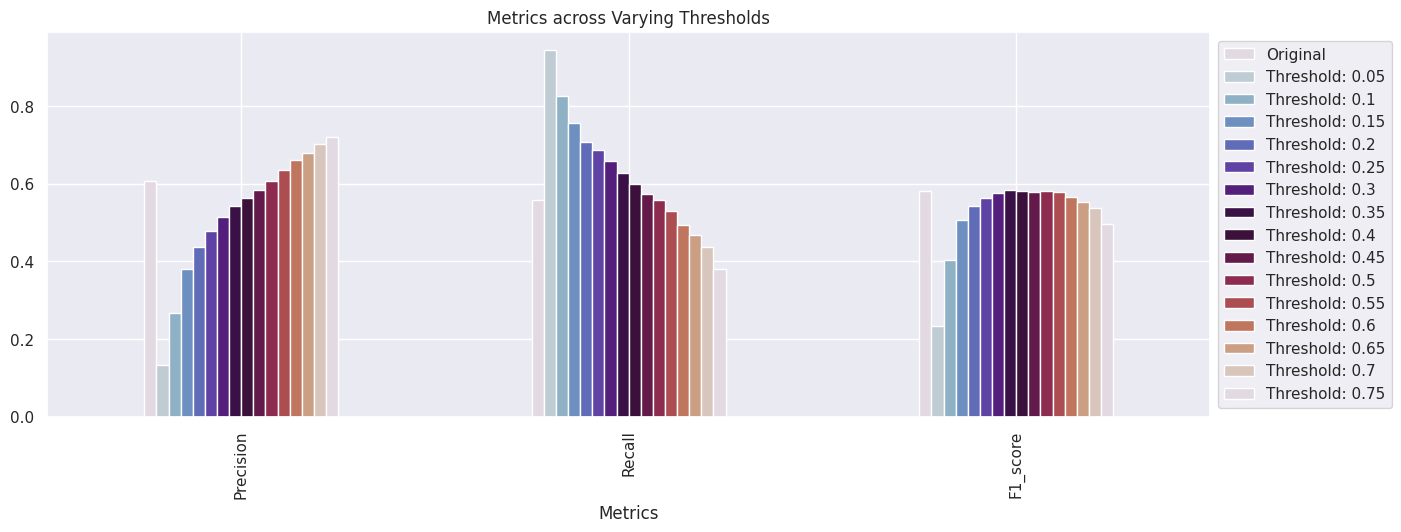

In [32]:
sns.set()
adj_threshold.plot(x='Metrics',
        kind='bar',
        stacked=False,
        title='Metrics across Varying Thresholds',
        figsize=(15, 5),
        cmap = 'twilight').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

#### Training and Testing the model with the optimal threshold


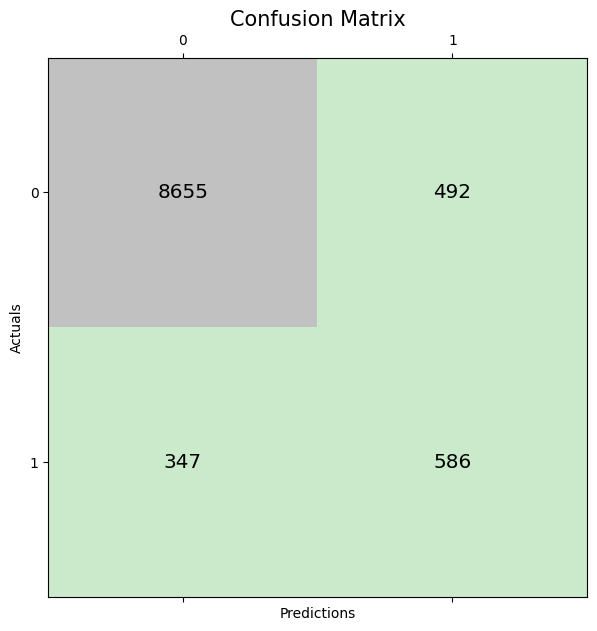

In [44]:
y_pred_new_threshold = (GB.predict_proba(X_test)[:, 1] >= 0.35).astype(int)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_new_threshold)

fig, ax = plt.subplots(figsize=(7, 7))
ax.matshow(conf_matrix, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va="center", ha="center", size="x-large")

plt.xlabel("Predictions", fontsize=10)
plt.ylabel("Actuals", fontsize=10)
plt.title("Confusion Matrix", fontsize=15)
plt.show()

In [45]:
precision_changedthreshold =  round(precision_score(y_test, y_pred_new_threshold), 4)
recall_changedthreshold = round(recall_score(y_test, y_pred_new_threshold), 4)
F1_changedthreshold =  round(f1_score(y_test, y_pred_new_threshold), 4)
metrics_changedthreshold = [precision_changedthreshold, recall_changedthreshold, F1_changedthreshold]

changedthreshold = pd.DataFrame(list(zip(metrics_original, metrics_changedthreshold)))
changedthreshold.index = ['Precision', 'Recall', 'F1_score']
changedthreshold.columns = ['Original Dataset', 'Threshold Changed Dataset']
changedthreshold

,Original Dataset,Threshold Changed Dataset
Precision,0.6082,0.5436
Recall,0.5573,0.6281
F1_score,0.5817,0.5828


## imblearn

### Under Sampling - SMOTE


In [46]:
from imblearn.over_sampling import SMOTE

#### Training and Testing model


#### Under Sampling - ADASYN

In [48]:
from imblearn.over_sampling import ADASYN

#### Training and Testing model


### Over Sampling


In [ ]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss


#### Training and Testing model


## Mixing Both


#### Training and Testing model


# A621


In [11]:
a621 = f"{data_folder}{pickle_files[1]}"
file = open(a621, "rb")
(X_train, y_train, X_val, y_val, X_test, y_test) = pickle.load(file)
print(f"Shapes: ", X_train.shape, X_val.shape, X_test.shape)

Shapes:  (9549, 24) (2428, 24) (10080, 24)


In [ ]:
y_train = transform_array(y_train)
print(f"y_train: {count_values_list(y_train)}")
y_val = transform_array(y_val)
print(f"y_val:   {count_values_list(y_val)}")
y_test = transform_array(y_test)
print(f"y_test:  {count_values_list(y_test)}")

y_train: {0: 8786, 1: 763}
y_val:   {0: 2201, 1: 227}
y_test:  {0: 9147, 1: 933}


# A627


In [12]:
a627 = f"{data_folder}{pickle_files[1]}"
file = open(a627, "rb")
(X_train, y_train, X_val, y_val, X_test, y_test) = pickle.load(file)
print(f"Shapes: ", X_train.shape, X_val.shape, X_test.shape)

Shapes:  (9549, 24) (2428, 24) (10080, 24)


In [ ]:
y_train = transform_array(y_train)
print(f"y_train: {count_values_list(y_train)}")
y_val = transform_array(y_val)
print(f"y_val:   {count_values_list(y_val)}")
y_test = transform_array(y_test)
print(f"y_test:  {count_values_list(y_test)}")

y_train: {0: 8786, 1: 763}
y_val:   {0: 2201, 1: 227}
y_test:  {0: 9147, 1: 933}


# A636


In [13]:
a636 = f"{data_folder}{pickle_files[1]}"
file = open(a636, "rb")
(X_train, y_train, X_val, y_val, X_test, y_test) = pickle.load(file)
print(f"Shapes: ", X_train.shape, X_val.shape, X_test.shape)

Shapes:  (9549, 24) (2428, 24) (10080, 24)


In [ ]:
y_train = transform_array(y_train)
print(f"y_train: {count_values_list(y_train)}")
y_val = transform_array(y_val)
print(f"y_val:   {count_values_list(y_val)}")
y_test = transform_array(y_test)
print(f"y_test:  {count_values_list(y_test)}")

y_train: {0: 8786, 1: 763}
y_val:   {0: 2201, 1: 227}
y_test:  {0: 9147, 1: 933}


# A652


In [14]:
a652 = f"{data_folder}{pickle_files[1]}"
file = open(a652, "rb")
(X_train, y_train, X_val, y_val, X_test, y_test) = pickle.load(file)
print(f"Shapes: ", X_train.shape, X_val.shape, X_test.shape)

Shapes:  (9549, 24) (2428, 24) (10080, 24)


In [ ]:
y_train = transform_array(y_train)
print(f"y_train: {count_values_list(y_train)}")
y_val = transform_array(y_val)
print(f"y_val:   {count_values_list(y_val)}")
y_test = transform_array(y_test)
print(f"y_test:  {count_values_list(y_test)}")

y_train: {0: 8786, 1: 763}
y_val:   {0: 2201, 1: 227}
y_test:  {0: 9147, 1: 933}
